# Logistic Regression

1. Import libraries - pandas, sklearn.
2. Read the dataset.
3. Split the dataset into train and test.
4. Train the model using training data.
5. Test the model using test data.
6. Evaluate the model.

Dataset used : https://www.kaggle.com/c/titanic/data

In [1]:
# preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# model imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def preprocessing(df):
    to_be_changed = ['Sex', 'Embarked']
    to_be_dropped = ['PassengerId', 'Name', 'Ticket']

    for col in to_be_changed:
        df[col] =  pd.factorize(df[col])[0]
    df['Cabin'] = df['Cabin'].apply(lambda x:0 if isinstance(x, float) else 1)
    df.drop(columns=['Name', 'Ticket'], inplace=True)
    df.fillna(0, inplace=True)

In [3]:
titanic_test = pd.read_csv('test.csv')
preprocessing(titanic_test)
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,7.8292,0,0
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,0,0
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0.0,0,0,8.0500,0,1
414,1306,1,1,39.0,0,0,108.9000,1,2
415,1307,3,0,38.5,0,0,7.2500,0,1
416,1308,3,0,0.0,0,0,8.0500,0,1


In [4]:
titanic_train = pd.read_csv('train.csv')
preprocessing(titanic_train)
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0
887,888,1,1,1,19.0,0,0,30.0000,1,0
888,889,0,3,1,0.0,1,2,23.4500,0,0
889,890,1,1,0,26.0,0,0,30.0000,1,1


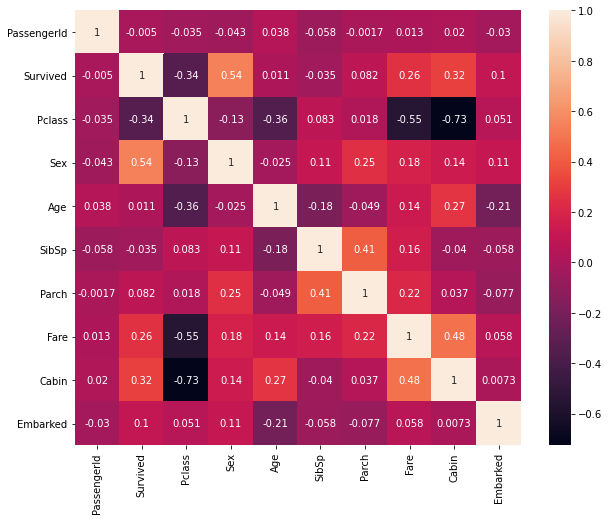

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_train.corr(), annot=True)
plt.show()

In [6]:
x = titanic_train.drop(columns='Survived')
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,38.0,1,0,71.2833,1,1
2,3,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0,0
887,888,1,1,19.0,0,0,30.0000,1,0
888,889,3,1,0.0,1,2,23.4500,0,0
889,890,1,0,26.0,0,0,30.0000,1,1


In [7]:
y = titanic_train['Survived'].to_numpy()
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('Train features  :', x_train.shape)
print('Train labels    :', y_train.shape)
print('\nTest features   :', x_test.shape)
print('Test labels     :', y_test.shape)

Train features  : (712, 9)
Train labels    : (712,)

Test features   : (179, 9)
Test labels     : (179,)


## Logistic Regression model

In [9]:
model = LogisticRegression(max_iter=1000).fit(x_train, y_train)

### Evaluation

In [10]:
y_pred = model.predict(x_test)
y_pred.shape, y_test.shape

((179,), (179,))

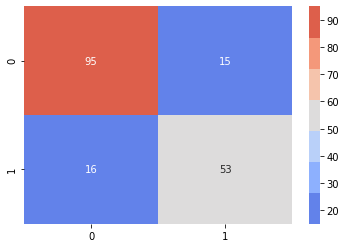

In [11]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt="d", cmap=sns.color_palette("coolwarm", 7))
plt.show()

In [12]:
print('Coefficients\n', (model.coef_))
print('\nMean sqaured error : %.3f' % (mean_squared_error(y_test, y_pred)))
print('\nAccuracy : %.3f %%' % (model.score(x_test, y_test)*100))
print('\nR2 score : %.3f' % (r2_score(y_test, y_pred)))

Coefficients
 [[ 2.66974377e-05 -6.31881598e-01  2.57613660e+00 -1.56487897e-02
  -3.20115938e-01 -1.27565647e-02  2.26691539e-03  5.94635228e-01
   9.37653340e-02]]

Mean sqaured error : 0.173

Accuracy : 82.682 %

R2 score : 0.269


## Prediction for other values

In [13]:
y_pred_test = model.predict(titanic_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,